In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns 
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import pickle



In [48]:
df = pd.read_csv(r'C:\Users\rajal\Desktop\projects\Ml_Projects\notebook\data\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [53]:
df_train, df_test = train_test_split(df)

In [54]:
df_train.size

5184

In [55]:
df_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\rajal\AppData\Local\Temp\ipykernel_10792\1485611768.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\rajal\AppData\Local\Temp\ipykernel_10792\1485611768.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\rajal\AppData\Local\Temp\ipykernel_10792\1485611768.py:3: UserWarning:



`distplot` is

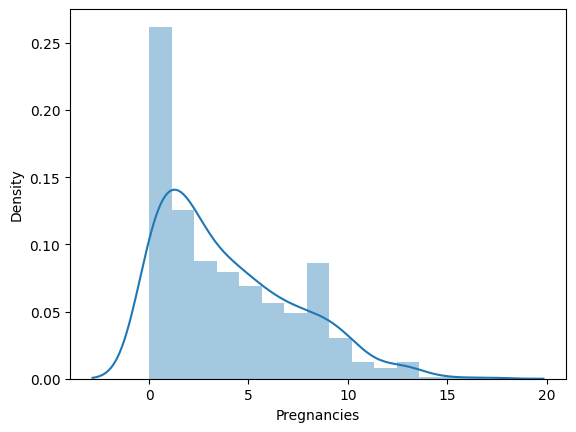

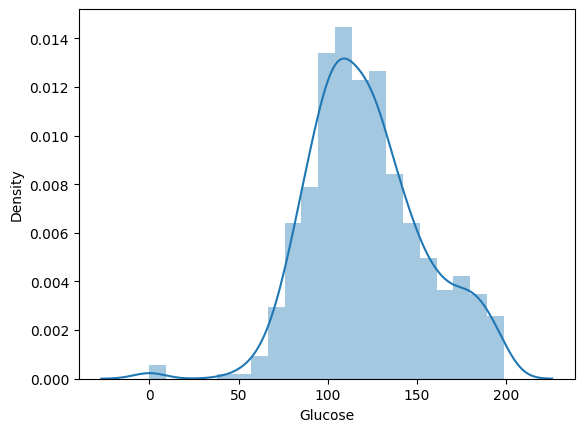

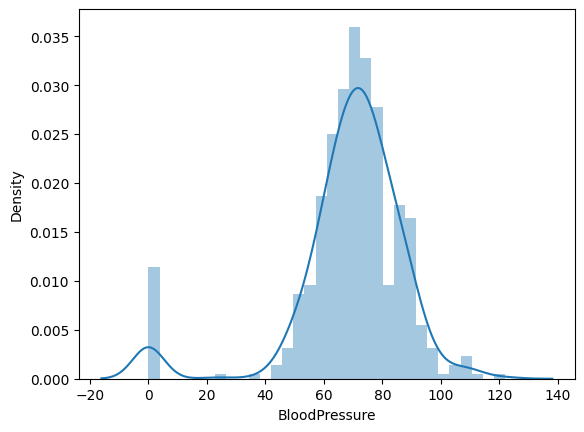

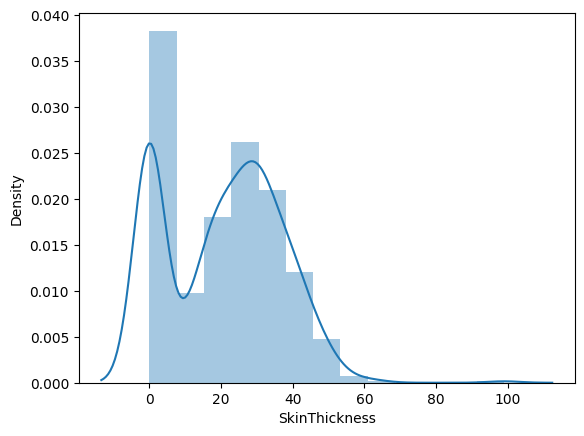

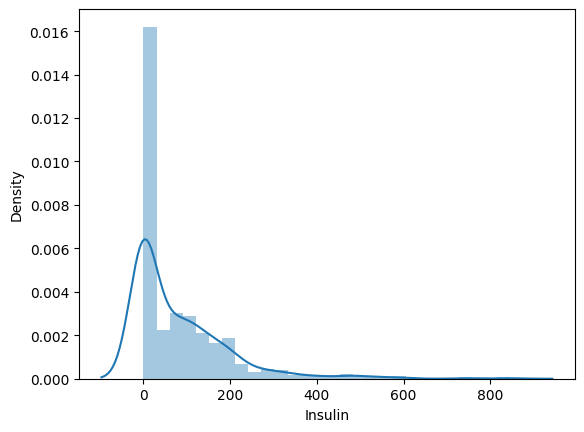

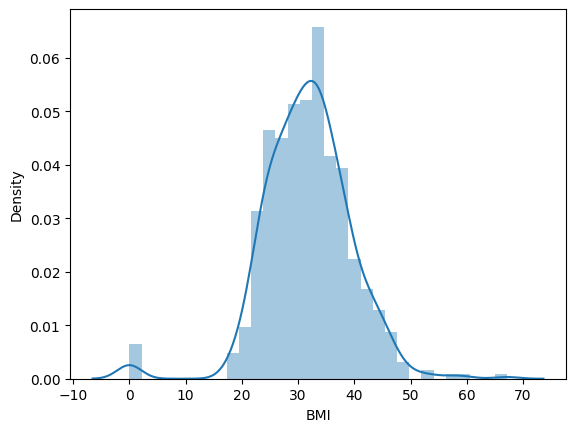

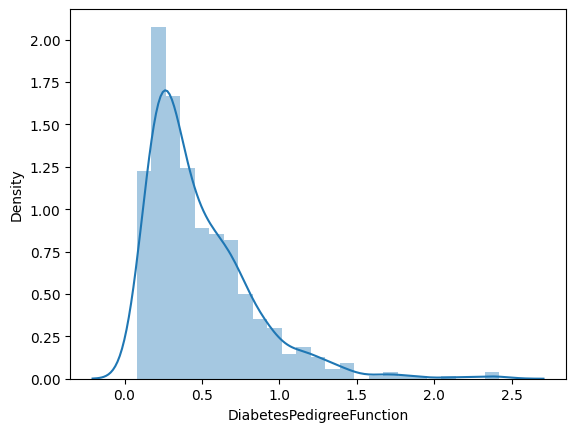

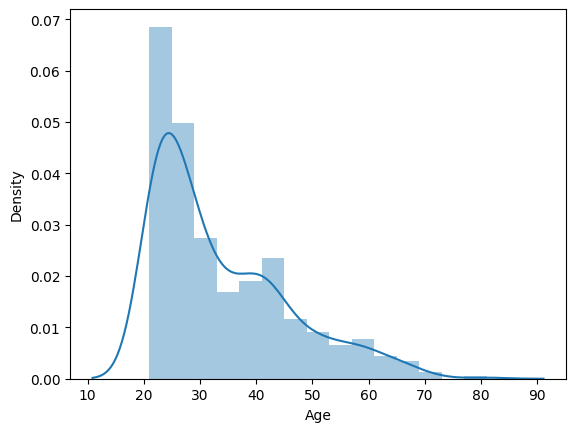

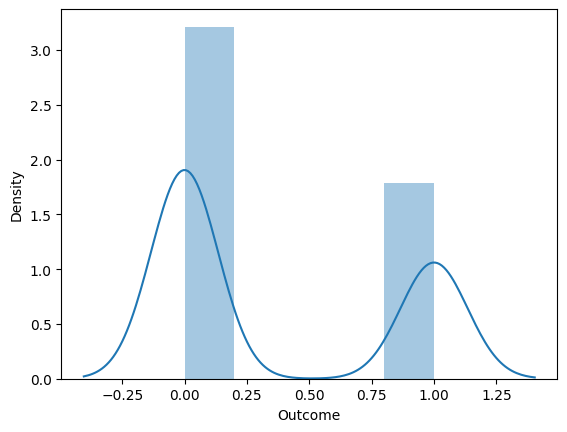

In [56]:
for i in df_train.columns:
    plt.figure()
    sns.distplot(df_train[i])


In [57]:
df_train.Pregnancies.unique()

array([ 1,  2,  0,  3,  8,  9,  5, 11,  7,  4, 10, 12, 13, 14,  6, 15, 17],
      dtype=int64)

**Glucose:** Blood sugar, or glucose, is the main sugar found in your blood. It comes from the food you eat, and is your body's main source of energy. Your blood carries glucose to all of your body's cells to use for energy.
Diabetes is a disease in which your blood sugar levels are too high.

1. 200(mg/dl) or higher in  Random blood sugar test ( A blood sample will be taken at a random time ) suggests diabetes
2. Fasting blood sugar test (A blood sample will be taken after an overnight fast )
    *   less than 100 is normal 
    *   100 to 125 mg/dL is considered prediabetes 
    *   126 mg/dL or higher is diabetes


    
   

**BloodPressure:** Blood pressure is the force of your blood pushing against the walls of your arteries. Each time your heart beats, it pumps blood into the arteries. Your blood pressure is highest when your heart beats, pumping the blood. This is called systolic pressure. When your heart is at rest, between beats, your blood pressure falls. This is called diastolic pressure.
Your blood pressure reading uses these two numbers. Usually the systolic number comes before or above the diastolic number. For example, 120/80 means a systolic of 120 and a diastolic of 80. 

1.  120/ 80 is the normal BP
2.  140/90 or higher High Blood Pressure (no other heart risk factors) 
3.  130/ 80 or higher High Blood Pressure (with other heart risk factors, according to some providers)
4.  180/120 or higher Dangerously high blood pressure - seek medical care right away

In columns like Glucose, BloodPressure, Skinthickness, BMI we see some values are 0. 






In [58]:
for col in df_train.columns:
    if col=='Pregnancies':
        continue
    elif col =='Outcome':
        continue
    else:
        df_train[col].replace(0, np.nan,inplace= True)

 



In [59]:
df_train.isnull().sum()

Pregnancies                   0
Glucose                       3
BloodPressure                25
SkinThickness               167
Insulin                     277
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [60]:
df_train = df_train.fillna(df_train.median())

In [61]:
df_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
y_train = df_train.Outcome
x_train = df_train.drop('Outcome', axis = 1)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
342,1,119.0,68.0,35.0,125.0,32.0,0.389,22
305,2,120.0,76.0,37.0,105.0,39.7,0.215,29
383,1,90.0,62.0,18.0,59.0,25.1,1.268,25
589,0,73.0,72.0,28.0,125.0,21.1,0.342,25
127,1,118.0,58.0,36.0,94.0,33.3,0.261,23
...,...,...,...,...,...,...,...,...
411,1,112.0,72.0,30.0,176.0,34.4,0.528,25
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25
398,3,82.0,70.0,28.0,125.0,21.1,0.389,25
499,6,154.0,74.0,32.0,193.0,29.3,0.839,39


In [63]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [64]:
y_train

342    0
305    0
383    0
589    0
127    0
      ..
411    0
370    1
398    0
499    0
58     0
Name: Outcome, Length: 576, dtype: int64

In [65]:
sm = SMOTE()
x_train,y_train = sm.fit_resample(x_train,y_train)

In [66]:
for col in df_test.columns:
    if col=='Pregnancies':
        continue
    elif col =='Outcome':
        continue
    else:
        df_test[col].replace(0, np.nan,inplace= True)


In [67]:
df_test = df_test.fillna(df_test.median())

In [68]:
y_test = df_test.Outcome
x_test = df_test.drop('Outcome', axis = 1)

In [69]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.60542168,  0.7973079 ,  0.61975609, ..., -0.39840704,
        -0.90730131,  1.3615977 ],
       [-1.17075601, -0.04576794, -0.53285302, ...,  0.30859924,
        -0.83325857, -0.05316935],
       [-0.28266717, -1.24552971, -0.36819458, ..., -0.0449039 ,
         0.31588487, -0.71894208],
       ...,
       [-0.28266717, -0.66186182,  0.12578076, ..., -0.39840704,
        -1.07611878, -0.13639094],
       [ 0.01336245,  1.02428986, -0.86216991, ...,  0.08765978,
        -0.73256043, -0.88538526],
       [-0.8747264 , -1.21310372, -0.53285302, ..., -0.82555667,
        -0.3949255 , -0.21961253]])

## Model building

## Logistic Regression


In [70]:
parameters = {'C': [1, 2, 3, 4, 5, 10]}

Logistic_Regression = GridSearchCV(
    LogisticRegression(), param_grid=parameters, cv=5, n_jobs=-1)
Logistic_Regression.fit(x_train, y_train)

print(f'The best parameters are {Logistic_Regression .best_params_}\n')
print(f'The best score is {Logistic_Regression .best_score_}')


lg_clf = Logistic_Regression.best_estimator_

Logistic_Regression_train_accuracy = accuracy_score(
    y_train, lg_clf.predict(x_train))
Logistic_Regression_test_accuracy = accuracy_score(y_test, lg_clf.predict(x_test))


print(
    f'Training Accuracy of Logistic_Regression is {Logistic_Regression_train_accuracy}\n')
print(
    f'Test Accuracy of Logistic_Regression is {Logistic_Regression_test_accuracy } \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, lg_clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, lg_clf.predict(x_test))}')

The best parameters are {'C': 1}

The best score is 0.7608108108108108
Training Accuracy of Logistic_Regression is 0.7702702702702703

Test Accuracy of Logistic_Regression is 0.7239583333333334 

Confusion Matrix :- 
[[99 31]
 [22 40]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       130
           1       0.56      0.65      0.60        62

    accuracy                           0.72       192
   macro avg       0.69      0.70      0.70       192
weighted avg       0.74      0.72      0.73       192



## DecisionTree

In [71]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [1, 2, 3, 5, 7], }

Decision_tree_clf = GridSearchCV(
    DecisionTreeClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
Decision_tree_clf.fit(x_train, y_train)

print(f'The best parameters are {Decision_tree_clf .best_params_}\n')
print(f'The best score is {Decision_tree_clf .best_score_}')


clf = Decision_tree_clf.best_estimator_

Decision_tree_clf_train_accuracy = accuracy_score(
    y_train, clf.predict(x_train))
Decision_tree_clf_test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(
    f'Training Accuracy of Decision_tree_clf is {Decision_tree_clf_train_accuracy}\n')
print(
    f'Test Accuracy of Decision_tree_clf is {Decision_tree_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf.predict(x_test))}')

The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}

The best score is 0.777027027027027
Training Accuracy of Decision_tree_clf is 0.7932432432432432

Test Accuracy of Decision_tree_clf is 0.7447916666666666 

Confusion Matrix :- 
[[108  22]
 [ 27  35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       130
           1       0.61      0.56      0.59        62

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.74      0.74      0.74       192



## KNN

In [72]:
n = list(range(1, 30))

parameters = {'n_neighbors': n}

knn_clf = GridSearchCV(KNeighborsClassifier(),
                       param_grid=parameters, cv=5, n_jobs=-1)
knn_clf.fit(x_train, y_train)

print(f'The best parameters are {knn_clf .best_params_}\n')
print(f'The best score is {knn_clf .best_score_}')


clf = knn_clf.best_estimator_

knn_clf_train_accuracy = accuracy_score(y_train, clf.predict(x_train))
knn_clf_test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(f'Training Accuracy of knn_clf is {knn_clf_train_accuracy}\n')
print(f'Test Accuracy of knn_clf is {knn_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf.predict(x_test))}')

The best parameters are {'n_neighbors': 1}

The best score is 0.8162162162162161
Training Accuracy of knn_clf is 1.0

Test Accuracy of knn_clf is 0.640625 

Confusion Matrix :- 
[[92 38]
 [31 31]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       130
           1       0.45      0.50      0.47        62

    accuracy                           0.64       192
   macro avg       0.60      0.60      0.60       192
weighted avg       0.65      0.64      0.65       192



## Random Forest

In [73]:
parameters = {'n_estimators': [10, 17, 25, 33, 41, 48],
              'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6],
              'min_samples_split': [2, 3, 4]}

Random_forest_clf = GridSearchCV(
    RandomForestClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
Random_forest_clf.fit(x_train, y_train)

print(f'The best parameters are {Random_forest_clf .best_params_}\n')
print(f'The best score is {Random_forest_clf .best_score_}')


clf = Random_forest_clf.best_estimator_

Random_forest_clf_train_accuracy = accuracy_score(
    y_train, clf.predict(x_train))
Random_forest_clf_test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(
    f'Training Accuracy of Random_forest_clf is {Random_forest_clf_train_accuracy}\n')
print(
    f'Test Accuracy of Random_forest_clf is {Random_forest_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf.predict(x_test))}')

The best parameters are {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 25}

The best score is 0.818918918918919
Training Accuracy of Random_forest_clf is 0.8567567567567568

Test Accuracy of Random_forest_clf is 0.7708333333333334 

Confusion Matrix :- 
[[103  27]
 [ 17  45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       130
           1       0.62      0.73      0.67        62

    accuracy                           0.77       192
   macro avg       0.74      0.76      0.75       192
weighted avg       0.78      0.77      0.77       192



In [74]:
parameters = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25],
              'max_depth': [2, 3, 4, 5, 6, 8, 9],
              'min_child_weight': [1, 3, 4, 5, 7],
              'gamma': [0.3, 0.4, 0.5, 0.7]}

xgboost_clf = GridSearchCV(
    XGBClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
xgboost_clf.fit(x_train, y_train)

print(f'The best parameters are {xgboost_clf .best_params_}\n')
print(f'The best score is {xgboost_clf .best_score_}')


clf = xgboost_clf.best_estimator_

xgboost_clf_train_accuracy = accuracy_score(y_train, clf.predict(x_train))
xgboost_clf_test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(f'Training Accuracy of xgboost_clf is {xgboost_clf_train_accuracy}\n')
print(f'Test Accuracy of xgboost_clf is {xgboost_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf.predict(x_test))}')

The best parameters are {'gamma': 0.5, 'learning_rate': 0.25, 'max_depth': 6, 'min_child_weight': 1}

The best score is 0.8121621621621621
Training Accuracy of xgboost_clf is 1.0

Test Accuracy of xgboost_clf is 0.7552083333333334 

Confusion Matrix :- 
[[102  28]
 [ 19  43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       130
           1       0.61      0.69      0.65        62

    accuracy                           0.76       192
   macro avg       0.72      0.74      0.73       192
weighted avg       0.77      0.76      0.76       192



In [75]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost'],
    'Train_Score': [Logistic_Regression_train_accuracy, knn_clf_train_accuracy, Decision_tree_clf_train_accuracy, Random_forest_clf_train_accuracy, xgboost_clf_train_accuracy],
    'Test_Score': [Logistic_Regression_test_accuracy, knn_clf_test_accuracy, Decision_tree_clf_test_accuracy, Random_forest_clf_test_accuracy, xgboost_clf_test_accuracy]
})


model_compare = models.sort_values(by='Test_Score', ascending=False)
model_compare

,Model,Train_Score,Test_Score
3,Random Forest Classifier,0.856757,0.770833
4,XgBoost,1.000000,0.755208
2,Decision Tree Classifier,0.793243,0.744792
0,Logistic Regression,0.770270,0.723958
1,KNN,1.000000,0.640625


In [76]:
xgbclf = XGBClassifier(gamma=0.4, learning_rate= 0.15, max_depth= 8, min_child_weight= 1)
xgbclf. fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [77]:
xgbclf.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])